In [2]:
import pickle as pkl 
import numpy as np 
import matplotlib.pyplot as plt
from qiskit.quantum_info import state_fidelity
import math

from analysis_utils import correct_counts, counts_to_statevector

## D1Q3 Error Analysis

In [3]:
# graph counts vs number shots
with open('d1q3_sampleincr_counts.pkl', 'rb') as f:
    sampleincr_counts_all = pkl.load(f)

with open('d1q3_sampleincr_statevector.pkl', 'rb') as f:
    sampleincr_sv_all = pkl.load(f)

In [9]:
keys = list(sampleincr_counts_all.keys())

fidelity_keys = []
fidelity_values = []

for power, iteration in keys:
    counts = sampleincr_counts_all[(power, iteration)]
    expected_sv = sampleincr_sv_all[(power, iteration)]

    if len(list(counts.values())) != pow(2, 9):
        counts = correct_counts(counts, 9)   

    counts_sv = counts_to_statevector(counts)

    counts_abs = np.abs(np.array(counts_sv))
    expected_abs = np.abs(np.array(expected_sv))

    fid = counts_abs.dot(expected_abs)

    fidelity_keys.append(power)
    fidelity_values.append(fid)

1.0079541072823925
-1.854308424214303


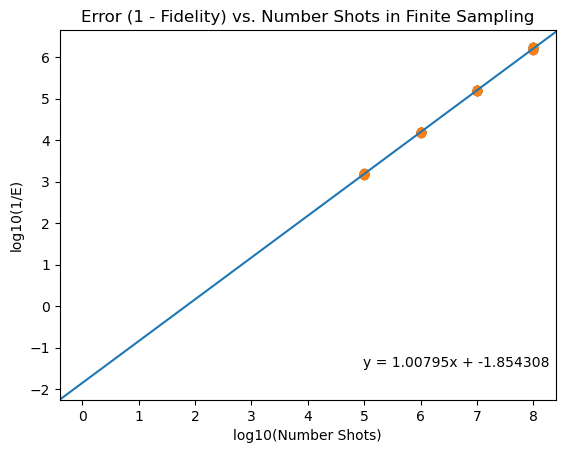

In [34]:
x = fidelity_keys
y = [math.log10(1 / (1 - i)) for i in fidelity_values]

fig, ax = plt.subplots()

m, b = np.polyfit(x, y, deg=1)

print(m)
print(b)


ax.scatter(x, y)
ax.ticklabel_format(useOffset=False)
plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')
plt.text(0.8, 0.1,'y = 1.00795x + -1.854308', horizontalalignment='center',
     verticalalignment='center',
     transform=ax.transAxes)
plt.xlabel("log10(Number Shots)")
plt.ylabel("log10(1/E)")
plt.title(f"Error (1 - Fidelity) vs. Number Shots in Finite Sampling")

plt.scatter(x, y)

plt.show()